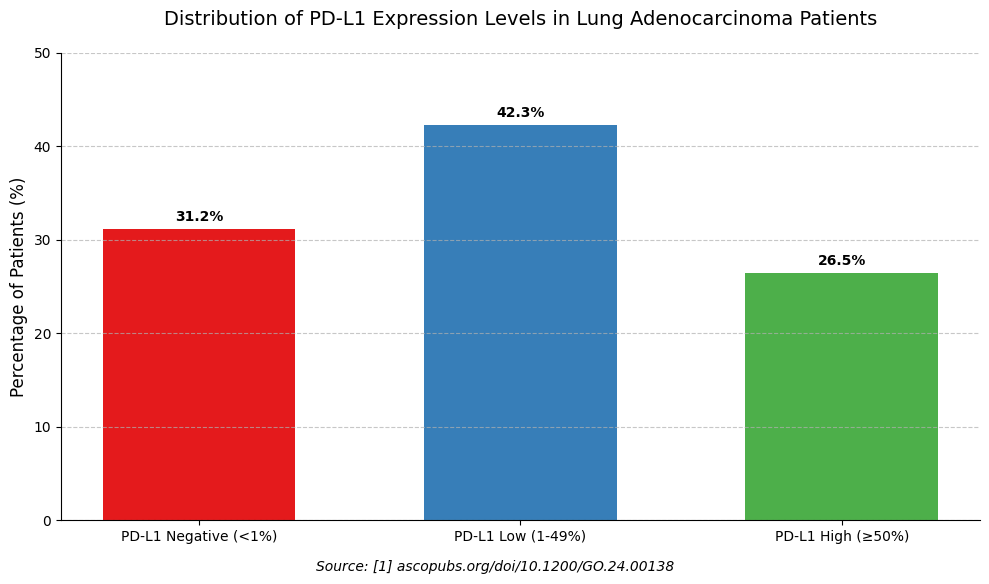

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# PD-L1 expression distribution data from clinical studies
categories = ['PD-L1 Negative (<1%)', 'PD-L1 Low (1-49%)', 'PD-L1 High (≥50%)']
percentages = [31.2, 42.3, 26.5]  # "31.2% with TPS <1%, 42.3% with TPS 1%-49%, and 26.5% with TPS ≥50%"

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create vertical bar chart
bars = ax.bar(categories, percentages, color=['#E41A1C', '#377EB8', '#4DAF4A'], width=0.6)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height}%', ha='center', va='bottom', fontweight='bold')

# Customize chart
ax.set_title('Distribution of PD-L1 Expression Levels in Lung Adenocarcinoma Patients', fontsize=14, pad=20)
ax.set_ylabel('Percentage of Patients (%)', fontsize=12)
ax.set_ylim(0, 50)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotation about data source
plt.figtext(0.5, 0.01,
           "Source: [1] ascopubs.org/doi/10.1200/GO.24.00138",
           ha="center", fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('pd_l1_expression_distribution.png', dpi=300)
plt.show()

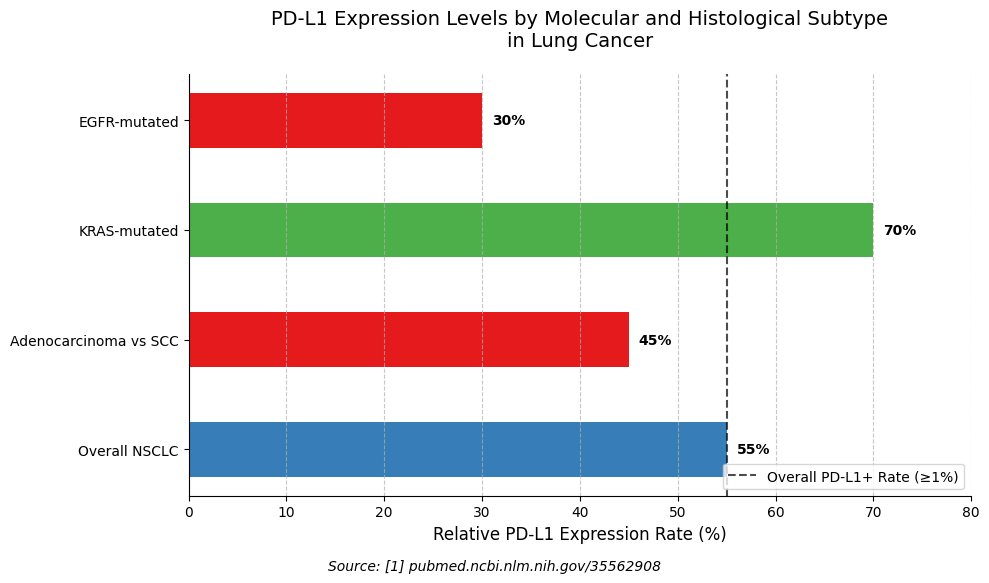

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define categories and data
categories = ['Overall NSCLC', 'Adenocarcinoma vs SCC', 'KRAS-mutated', 'EGFR-mutated']
# Relative PD-L1 expression levels (standardized to show differences)
# Using "55% of the cases" for overall, adenocarcinomas "lower than squamous",
# "highest expression for KRAS-mutated cases, the lowest for EGFR-mutated"
pd_l1_expression = [55, 45, 70, 30]  # Benchmark the overall at 55% as stated in report

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors - red for negative deviation, green for positive deviation
colors = ['#377EB8', '#E41A1C', '#4DAF4A', '#E41A1C']

# Create horizontal bars
bars = ax.barh(categories, pd_l1_expression, color=colors, height=0.5)

# Add data labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    label_x_pos = width + 1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{pd_l1_expression[i]}%",
            va='center', fontweight='bold')

# Add a vertical line for the overall average
ax.axvline(x=55, color='black', linestyle='--', alpha=0.7, label='Overall PD-L1+ Rate (≥1%)')

# Customize chart
ax.set_title('PD-L1 Expression Levels by Molecular and Histological Subtype\nin Lung Cancer', fontsize=14, pad=20)
ax.set_xlabel('Relative PD-L1 Expression Rate (%)', fontsize=12)
ax.set_xlim(0, 80)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.legend(loc='lower right')

# Add annotation about data source
plt.figtext(0.5, 0.01,
           "Source: [1] pubmed.ncbi.nlm.nih.gov/35562908",
           ha="center", fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('pd_l1_expression_anomalies.png', dpi=300)
plt.show()

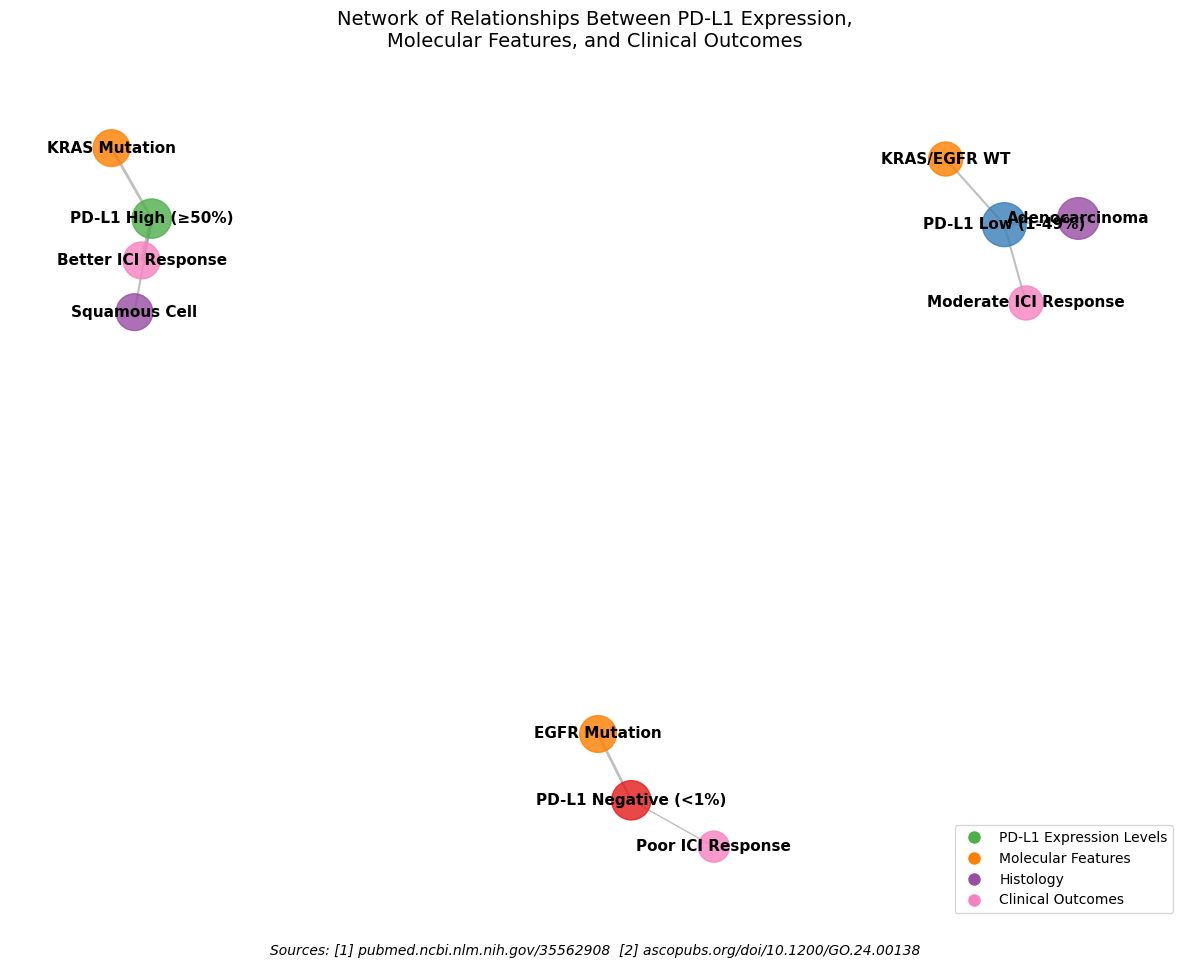

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create network graph
G = nx.Graph()

# Add nodes for different entities
# Main categories
G.add_node("PD-L1 High (≥50%)", size=800, color='#4DAF4A', category='expression')
G.add_node("PD-L1 Low (1-49%)", size=1000, color='#377EB8', category='expression')
G.add_node("PD-L1 Negative (<1%)", size=800, color='#E41A1C', category='expression')

# Molecular features
G.add_node("KRAS Mutation", size=700, color='#FF7F00', category='molecular')
G.add_node("EGFR Mutation", size=700, color='#FF7F00', category='molecular')
G.add_node("KRAS/EGFR WT", size=600, color='#FF7F00', category='molecular')

# Histology
G.add_node("Adenocarcinoma", size=900, color='#984EA3', category='histology')
G.add_node("Squamous Cell", size=700, color='#984EA3', category='histology')

# Clinical outcomes
G.add_node("Better ICI Response", size=700, color='#F781BF', category='outcome')
G.add_node("Moderate ICI Response", size=600, color='#F781BF', category='outcome')
G.add_node("Poor ICI Response", size=500, color='#F781BF', category='outcome')

# Add edges representing relationships from the data
# "high tumor PD-L1 expression…is linked to better response"
G.add_edge("PD-L1 High (≥50%)", "Better ICI Response", weight=5)
G.add_edge("PD-L1 Low (1-49%)", "Moderate ICI Response", weight=3)
G.add_edge("PD-L1 Negative (<1%)", "Poor ICI Response", weight=2)

# "the highest expression for KRAS-mutated cases, the lowest for EGFR-mutated"
G.add_edge("KRAS Mutation", "PD-L1 High (≥50%)", weight=4)
G.add_edge("EGFR Mutation", "PD-L1 Negative (<1%)", weight=4)
G.add_edge("KRAS/EGFR WT", "PD-L1 Low (1-49%)", weight=3)

# "adenocarcinomas exhibited lower PD-L1 expression than squamous cell carcinomas"
G.add_edge("Adenocarcinoma", "PD-L1 Low (1-49%)", weight=4)
G.add_edge("Squamous Cell", "PD-L1 High (≥50%)", weight=3)

# Create figure
plt.figure(figsize=(12, 10))

# Define node positions using spring layout
pos = nx.spring_layout(G, seed=42, k=0.5)

# Draw nodes with different sizes and colors based on categories
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]
node_colors = [G.nodes[node]['color'] for node in G.nodes()]

# Draw edges with weights influencing thickness
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_widths = [w/2 for w in edge_weights]

# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=11, font_weight='bold')

# Create a legend for node categories
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#4DAF4A', markersize=10, label='PD-L1 Expression Levels'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF7F00', markersize=10, label='Molecular Features'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#984EA3', markersize=10, label='Histology'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#F781BF', markersize=10, label='Clinical Outcomes')
]

plt.legend(handles=legend_elements, loc='lower right')
plt.title('Network of Relationships Between PD-L1 Expression,\nMolecular Features, and Clinical Outcomes', fontsize=14, pad=20)
plt.axis('off')

# Add citation
plt.figtext(0.5, 0.01,
           "Sources: [1] pubmed.ncbi.nlm.nih.gov/35562908  [2] ascopubs.org/doi/10.1200/GO.24.00138",
           ha="center", fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('pd_l1_correlation_network.png', dpi=300)
plt.show()